In [1]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras import utils
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [3]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = utils.to_categorical(train_labels)
test_labels = utils.to_categorical(test_labels)
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000, 10), (10000, 10))

In [4]:
train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

In [5]:
from SAE_model import SAE2

In [6]:
SAE2_model = SAE2(input_dim=784, latent_dim=[150, 75])
SAE2_model.load_weights('models/SAE2.h5')

d:\Python\Python310\lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [7]:
train_images = SAE2_model.encode(train_images)
test_images = SAE2_model.encode(test_images)
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

(TensorShape([60000, 75]), TensorShape([10000, 75]), (60000, 10), (10000, 10))

In [9]:
from classifer_model import Softmax_Classifer
from keras import optimizers
from keras import losses
from keras import metrics

In [10]:
Softmax_Classifer_model = Softmax_Classifer(input_dim=75, output_dim=10)
Softmax_Classifer_model.compile(
    optimizer=optimizers.Adam(),
    loss=losses.CategoricalCrossentropy(),
    metrics=[metrics.CategoricalAccuracy()]
)

d:\Python\Python310\lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [11]:
history = Softmax_Classifer_model.fit(train_images, train_labels, epochs=150, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.2691 - loss: 2.2198 - val_categorical_accuracy: 0.6992 - val_loss: 1.7846
Epoch 2/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - categorical_accuracy: 0.7128 - loss: 1.6837 - val_categorical_accuracy: 0.7892 - val_loss: 1.3869
Epoch 3/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - categorical_accuracy: 0.7943 - loss: 1.3231 - val_categorical_accuracy: 0.8239 - val_loss: 1.1218
Epoch 4/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - categorical_accuracy: 0.8225 - loss: 1.0899 - val_categorical_accuracy: 0.8399 - val_loss: 0.9447
Epoch 5/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - categorical_accuracy: 0.8378 - loss: 0.9258 - val_categorical_accuracy: 0.8519 - val_loss: 0.8221
Epoch 6/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - categorical_accuracy: 0.8480 - loss: 0.8133 - val_categorical_accuracy: 0.8604 - val_loss: 0.7346
Epoch 7/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - categorical_acc

In [12]:
Softmax_Classifer_model.save('models/SAE2_softmax.h5')

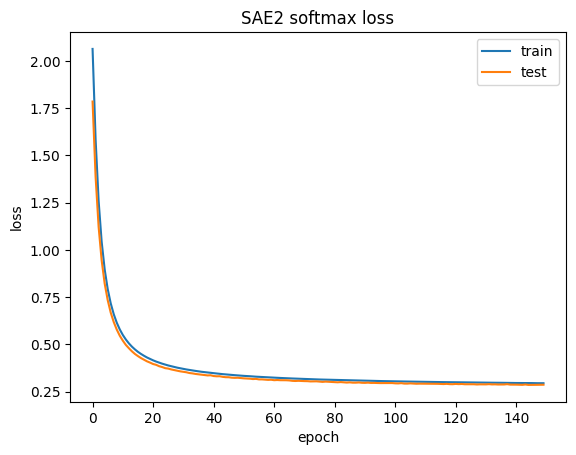

In [13]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('SAE2 softmax loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()